#### 1. Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import math

#### 1.1 Checking the version

In [2]:
print('Python : ', sys.version)
print('Numpy : ', np.__version__)
print("Matplotlib : " , matplotlib.__version__)
print("Pandas : " , pd.__version__)

Python :  3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy :  1.16.5
Matplotlib :  3.1.1
Pandas :  1.0.3


#### 2. Importing Dataset

In [3]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### 2.1 Checking NULL values

In [5]:
# print(dataset.isnull().sum(), "\nShape : ", dataset.shape)
# print(dataset.info())

#### 2.2 Selecting Columns

In [6]:
print(dataset.columns)
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### 2.3 Analysing the Pearson Correlations

In [7]:
y = dataset['price']
for column in columns:
    corr, _ = pearsonr(dataset[column].values, y )
    print('Pearsons correlation : Price and {} is {:0.3f}'.format(column, corr))

Pearsons correlation : Price and id is -0.017
Pearsons correlation : Price and price is 1.000
Pearsons correlation : Price and bedrooms is 0.308
Pearsons correlation : Price and bathrooms is 0.525
Pearsons correlation : Price and sqft_living is 0.702
Pearsons correlation : Price and sqft_lot is 0.090
Pearsons correlation : Price and floors is 0.257
Pearsons correlation : Price and waterfront is 0.266
Pearsons correlation : Price and view is 0.397
Pearsons correlation : Price and condition is 0.036
Pearsons correlation : Price and grade is 0.667
Pearsons correlation : Price and sqft_above is 0.606
Pearsons correlation : Price and sqft_basement is 0.324
Pearsons correlation : Price and yr_built is 0.054
Pearsons correlation : Price and yr_renovated is 0.126
Pearsons correlation : Price and zipcode is -0.053
Pearsons correlation : Price and lat is 0.307
Pearsons correlation : Price and long is 0.022
Pearsons correlation : Price and sqft_living15 is 0.585
Pearsons correlation : Price and s

* We can see the highest correalation between:
* sqft_living and price of .702 &
* grade and price of 0.667

#### 2.4 Making Graph to understand the spread of the Data

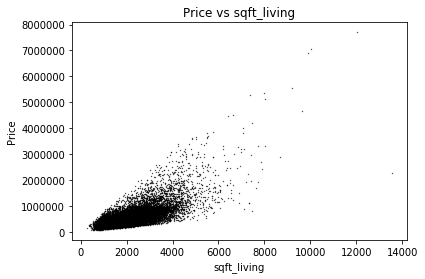

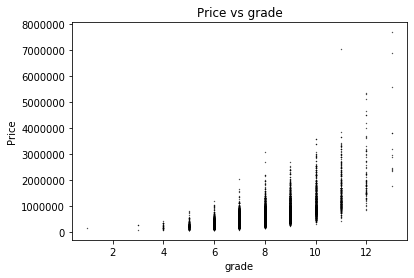

In [8]:
columns = ['sqft_living', 'grade']
for column in columns:
    x = dataset[column].values
    y = dataset['price'].values
    plt.scatter(x, y, s = 0.1, c = 'black')
    plt.title("Price vs {}".format(column))
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

**We choose sqft_living as out main feature because it shows maximum linear correlation with price**

In [9]:
dataset = dataset.loc[:, ['sqft_living', 'price']]
dataset.columns

Index(['sqft_living', 'price'], dtype='object')

#### 2.5 Managing outliers

In [10]:
dataset_filtered = dataset[dataset['price'] <= 6000000] 
dataset_filtered = dataset_filtered[dataset_filtered['sqft_living'] <= 6000] 

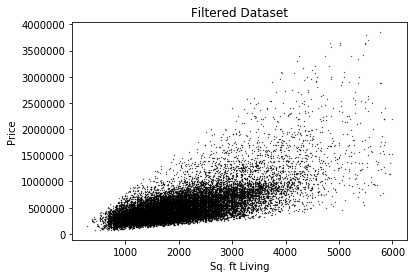

In [11]:
plt.scatter(dataset_filtered['sqft_living'], dataset_filtered['price'], s  = 0.1, c = 'black')
plt.title("Filtered Dataset")
plt.xlabel("Sq. ft Living")
plt.ylabel("Price")
plt.show()

In [12]:
corr, _ = pearsonr(dataset_filtered['sqft_living'].values, dataset_filtered['price'].values)
print('Pearsons correlation : price and {} is {:0.3f}'.format('sqft_living', corr))

Pearsons correlation : price and sqft_living is 0.680


#### 2.6 Statistical Analysis

In [13]:
dataset_filtered.describe()

,sqft_living,price
count,21545.000000,2.154500e+04
mean,2063.842191,5.333519e+05
std,870.947862,3.368384e+05
min,290.000000,7.500000e+04
25%,1420.000000,3.200000e+05
50%,1910.000000,4.500000e+05
75%,2540.000000,6.400000e+05
max,5990.000000,3.850000e+06


#### 3. Linear Regression Model

In [14]:
feature = ['sqft_living']
label = 'price'

#### 3.1 Spliting Data into Train, Test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(dataset_filtered, test_size = 0.3, random_state = 0)

#### 3.2 Function to make the features, outputs intp Numpy Array

In [16]:
def get_numpy_data(dataset, feature, label):
    m = dataset.shape[0]
    
    dataset['constant'] = 1.
    feature = ['constant'] + feature
    feature_matrix = dataset.loc[:, feature]
    feature_matrix = feature_matrix.values
    
    label_matrix = dataset.loc[:, label]
    label_matrix = label_matrix.values
    
    assert feature_matrix.shape == (m, 2)
    assert label_matrix.shape == (m, )
    
    return feature_matrix, label_matrix

In [17]:
# features, output = get_numpy_data(x_train, feature, label)

#### 3.3 Function Predict Values using weights and features

In [18]:
def prediction(weights, features):
    
    m = features.shape[0]
    
    predictions = np.dot(weights, features.T)
    
    assert predictions.shape == (m, )
    
    return predictions

In [19]:
# weights = np.array([1., 1.])
# predictions = prediction(weights, features)

#### 3.4 Function that calculate the error b\w Predicted and Actual values

In [20]:
def error_cal(predictions, output):
    m = predictions.shape[0]
    
    error = predictions - output
    
    assert error.shape == (m, )
    
    return error

In [21]:
# error = error_cal(predictions, output)

#### 3.5 Gradient Descent

In [22]:
def gradient_descent(dataset, feature, labels):
    
    tolerance = 2.5
    learning_rate = 7e-12
    converge = False
    m = dataset.shape[0]
    
    weights = np.array([1. ,1.])
    
    feature_matrix, output = get_numpy_data(dataset, feature, label)
    
    while not converge:
        predictions = prediction(weights, feature_matrix)

        error = error_cal(predictions, output)

        gradient_sum = 0
        
        derivative = 2*np.dot(error, feature_matrix[:, 0])
        gradient_sum_square = derivative**2
        weights[0] -= learning_rate*derivative
        
        derivative = 2*np.dot(error, feature_matrix[:, 1])
        gradient_sum_square = derivative**2
        weights[1] -= learning_rate*derivative
        
        gradient_magnitude = math.sqrt(gradient_sum)
        
        if gradient_magnitude < tolerance:
            converge = True
            
    return weights

#### 3.6 Calculating the Weights (Model Training)

In [23]:
weights = gradient_descent(dataset_filtered, feature, label)

In [24]:
print(weights)
m = weights[1]
c = weights[0]

[  1.16025213 391.63717235]


#### 4.1 Plotting Best Fit Line

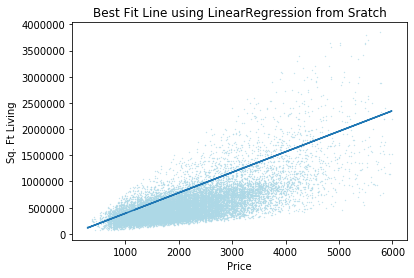

In [25]:
X = dataset_filtered['sqft_living']
Y = dataset_filtered['price']
plt.scatter(X, Y, s  = 0.1, c = 'lightblue')
yfit = [c + m * xi for xi in X]
plt.title("Best Fit Line using LinearRegression from Sratch")
plt.xlabel("Price")
plt.ylabel("Sq. Ft Living")
plt.plot(X, yfit)
plt.show()

#### 4.2 Calculating Test Values and RSS

In [26]:
x_test, y_test = get_numpy_data(x_test, feature, label)
y_pred = prediction(weights, x_test)
print("Residual sum of squares model: {:0.2f}".format(((y_pred - y_test) ** 2).sum()))

Residual sum of squares model: 966276970546781.88


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Using LinearRegression() from sklearn to Compare

In [27]:
df_train = pd.read_csv("kc_house_train_data.csv")
df_test = pd.read_csv("kc_house_test_data.csv")

In [28]:
df_train = df_train.loc[:,['bedrooms','bathrooms','sqft_living','lat','long','price']]
df_test = df_test.loc[:,['bedrooms','bathrooms','sqft_living','lat','long','price']]

In [29]:
df_train = df_train[df_train['price'] <= 7000000] 
df_train = df_train[df_train['sqft_living'] <= 8000] 

df_test = df_test[df_test['price'] <= 7000000] 
df_test = df_test[df_test['sqft_living'] <= 8000] 

In [30]:
x_train = df_train.loc[:, 'sqft_living'].values
y_train = df_train.loc[:, 'price'].values
x_test = df_test.loc[:, 'sqft_living'].values
y_test = df_test.loc[:, 'price'].values
x_train = x_train.reshape(x_train.shape[0],1)
y_train = y_train.reshape(y_train.shape[0],1)
x_test = x_test.reshape(x_test.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
print('Model-----------------')
print(model.coef_)
print(model.intercept_)
m = model.coef_.sum()
c = model.intercept_.sum()

Model-----------------
[[273.26369128]]
[-30018.47587674]


In [33]:
y_pred = model.predict(x_test)
print('TESTING DATA ----------------------------------------------------')
print("Residual sum of squares model : {:0.2f}".format(((y_pred - y_test) ** 2).sum()))

TESTING DATA ----------------------------------------------------
Residual sum of squares model : 257533389365035.50


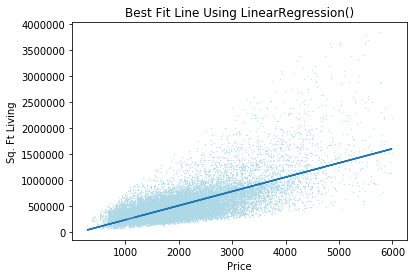

In [34]:
X = dataset_filtered['sqft_living']
Y = dataset_filtered['price']
plt.scatter(X, Y, s  = 0.1, c = 'lightblue')
yfit = [c + m * xi for xi in X]
plt.title("Best Fit Line Using LinearRegression()")
plt.xlabel("Price")
plt.ylabel("Sq. Ft Living")
plt.plot(X, yfit)
plt.show()